In [2]:
import sys
sys.path.append('../../code/hnn_beta')
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from sbi import inference as sbi_inference
from utils import (log_scale_forward, UniformPrior, hnn_beta_param_function
                   get_dataset_psd, get_dataset_peaks, load_posterior, simulator_hnn)
from hnn_core import jones_2009_model
from functools import partial
import dill
from sbi import utils as sbi_utils
import pandas as pd
from sklearn.decomposition import PCA
rng_seed = 123

sns.set()
sns.set_style("white")

device = 'cpu'

In [3]:
x = np.load('../../data/hnn_beta/sbi_sims/x_sbi.npy')

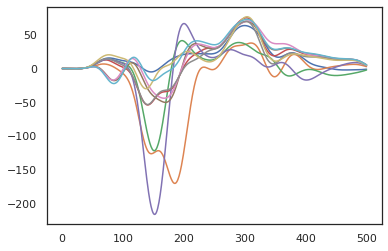

In [14]:
%matplotlib inline
idx = 90
_ = plt.plot(x[idx:idx+10,0,:].T)

### Generate conditioning waveform

In [19]:
# Parameter bounds
prior_dict = {'l5dend_inh': {'bounds': (-5, 1), 'rescale_function': log_scale_forward},
              'l5soma_inh': {'bounds': (-5, 1), 'rescale_function': log_scale_forward}, 
              'l2soma_inh': {'bounds': (-5, 1), 'rescale_function': log_scale_forward}}

net = jones_2009_model()
simulator = partial(simulator_hnn, prior_dict=prior_dict, param_function=hnn_beta_param_function,
                    network_model=net)


In [20]:
# Values on [0,1] mapped to range of bounds defined in prior_dict
theta_cond = np.array([0.9, 0.1, 0.5])

theta_dict = {param_name: param_dict['rescale_function'](theta_cond[idx], param_dict['bounds']) for 
              idx, (param_name, param_dict) in enumerate(prior_dict.items())}

x_cond = simulator(torch.tensor(theta_cond).float()).numpy()
print(theta_dict)

{'l5dend_inh': 0.316227679215638, 'l5soma_inh': 3.162277714419137e-05, 'l2soma_inh': 0.0031622776601683794}
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.5 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 200.0 ms...
Simulation time: 210.0 ms...
Simulation time: 220.0 ms...
Simulation time: 230.0 ms...
Simulation time: 240.0 ms...
{'l5dend_inh': 0.31622776601683794, 'l5soma_inh': 3.1622776601683795e-05, 'l2soma_inh': 0.

/home/ntolley/Jones_Lab/hnn_sbi_examples/notebooks/hnn_erp/../../code/hnn_erp/utils.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype=torch.float32)


Text(0, 0.5, 'Dipole (nAm)')

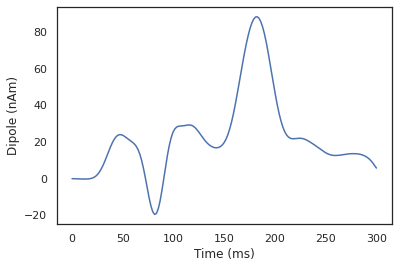

In [21]:
%matplotlib inline
t_vec = np.linspace(0, 300, x_cond.shape[1])
plt.plot(t_vec, x_cond.squeeze())
plt.xlabel('Time (ms)')
plt.ylabel('Dipole (nAm)')

Text(0, 0.5, 'Dipole (nAm)')

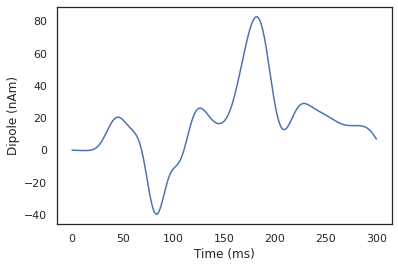

In [12]:
%matplotlib inline
t_vec = np.linspace(0, 300, x_cond.shape[1])
plt.plot(t_vec, x_cond.squeeze())
plt.xlabel('Time (ms)')
plt.ylabel('Dipole (nAm)')